# Practical Text Classification With Python and Keras
https://realpython.com/python-keras-text-classification/

In [1]:
import pandas as pd
dataset = pd.read_csv("train_disastor.csv", # the location to the data file
                       sep=",", nrows = 10000 # for tab delimited documents, use "\t" as the seperator
                       #names=["user ID", "book ID", "rating"] # define the names for the three columns
                       )
dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [3]:
vectorizer = CountVectorizer(binary=True, stop_words="english")
X = vectorizer.fit_transform(dataset["text"])
df_tf = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
df_tf

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Partition the data set

from sklearn.model_selection  import train_test_split

# partition: train/test = 70/30
train_x, test_x, train_y, test_y = train_test_split(df_tf, dataset["target"], test_size=0.3, random_state=123)

# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=df_tf.columns)
df_test_x = pd.DataFrame(test_x, columns=df_tf.columns)
df_train_y = pd.DataFrame(train_y, columns=["target"])
df_test_y = pd.DataFrame(test_y, columns=["target"])

print ("shapes")
print (df_train_x.shape)
print (df_test_x.shape)
print (df_train_y.shape)
print (df_test_y.shape)

print 

print ("class counts")
print (dataset["target"].value_counts())
print (df_train_y["target"].value_counts())
print (df_test_y["target"].value_counts())
# the class counts show that the sampling is roughly stratified

shapes
(5329, 21363)
(2284, 21363)
(5329, 1)
(2284, 1)
class counts
0    4342
1    3271
Name: target, dtype: int64
0    3029
1    2300
Name: target, dtype: int64
0    1313
1     971
Name: target, dtype: int64


In [5]:
import tensorflow as tf
from tensorflow import keras

# Keras is a high level Deep Learning API that makes it very simple to train and
#run neural networks. It can run on top of either TensorFlow, Theano or Micro‐
#soft Cognitive Toolkit (formerly known as CNTK). TensorFlow comes with its
#own implementation of this API, called tf.keras, which provides support for some
#advanced TensorFlow features (e.g., to efficiently load data).


Your First Keras Model
Now you are finally ready to experiment with Keras. Keras supports two main types of models. You have the Sequential model API which you are going to see in use in this tutorial and the functional API which can do everything of the Sequential model but it can be also used for advanced models with complex network architectures.

The Sequential model is a linear stack of layers, where you can use the large variety of available layers in Keras. The most common layer is the Dense layer which is your regular densely connected neural network layer with all the weights and biases that you are already familiar with.

Let’s see if we can achieve some improvement to our previous models we created. 

Before we build our model, we need to know the input dimension of our feature vectors. This happens only in the first layer since the following layers can do automatic shape inference. In order to build the Sequential model, you can add layers one by one in order as follows:

In [6]:
from keras.models import Sequential
from keras import layers

input_dim = train_x.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Before you can start with the training of the model, you need to configure the learning process. This is done with the .compile() method. This method specifies the optimizer and the loss function.

Additionally, you can add a list of metrics which can be later used for evaluation, but they do not influence the training. In this case, we want to use the binary cross entropy and the Adam optimizer you saw in the primer mentioned before. Keras also includes a handy .summary() function to give an overview of the model and the number of parameters available for training:

In [8]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
               metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                213640    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 213,651
Trainable params: 213,651
Non-trainable params: 0
_________________________________________________________________


You might notice that we have 213640 parameters for the first layer and another 11 in the second one. Where did those come from?

See, we have 21363 dimensions for each feature vector, and then we have 10 nodes. We need weights for each feature dimension and each node which accounts for 21363 * 10 = 213630 parameters, and then we have another 10 times an added bias for each node, which gets us the 213640 parameters. In the final node, we have another 10 weights and one bias, which gets us to 11 parameters. That’s a total of 213,651 parameters for both layers.

Neat! You are almost there. Now it is time to start your training with the .fit() function.

Since the training in neural networks is an iterative process, the training won’t just stop after it is done. You have to specify the number of iterations you want the model to be training. Those completed iterations are commonly called epochs. We want to run it for 100 epochs to be able to see how the training loss and accuracy are changing after each epoch.

Another parameter you have to your selection is the batch size. The batch size is responsible for how many samples we want to use in one epoch, which means how many samples are used in one forward/backward pass. This increases the speed of the computation as it need fewer epochs to run, but it also needs more memory, and the model may degrade with larger batch sizes. Since we have a small training set, we can leave this to a low batch size:

In [9]:
#X_valid, X_train = train_x[:4490], train_x[4490:]
#y_valid, y_train = train_y[:4490], train_y[4490:]
#X_test = test_x

history = model.fit(train_x, train_y,
                     epochs=100,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size=10)

Note that if you rerun the .fit() method, you’ll start off with the computed weights from the previous training. Make sure to call clear_session() before you start training the model again:

from keras.backend import clear_session clear_session()

In [10]:
history.params

{'verbose': False, 'epochs': 100, 'steps': 533}

In [11]:
history.history

{'loss': [0.571645200252533,
  0.31905651092529297,
  0.18462182581424713,
  0.11415836215019226,
  0.07381534576416016,
  0.051857881247997284,
  0.038176730275154114,
  0.02955060824751854,
  0.024206841364502907,
  0.02070457674562931,
  0.01815079338848591,
  0.016202816739678383,
  0.015337774530053139,
  0.013893157243728638,
  0.013205994851887226,
  0.013582690618932247,
  0.012548946775496006,
  0.012183668091893196,
  0.011919112876057625,
  0.011934955604374409,
  0.011881289072334766,
  0.011765411123633385,
  0.011029906570911407,
  0.01130729354918003,
  0.010847251862287521,
  0.010469535365700722,
  0.011382602155208588,
  0.010826734825968742,
  0.01117862667888403,
  0.010134502314031124,
  0.010087190195918083,
  0.009704009629786015,
  0.010607565753161907,
  0.009655602276325226,
  0.010691466741263866,
  0.009500682353973389,
  0.010366392321884632,
  0.010175497271120548,
  0.009608172811567783,
  0.00980488769710064,
  0.010001960210502148,
  0.00975667405873537

To make your life easier, you can use this little helper function to visualize the loss and accuracy for the training and testing data based on the History callback. This callback, which is automatically applied to each Keras model, records the loss and additional metrics that can be added in the .fit() method. In this case, we are only interested in the accuracy. This helper function employs the matplotlib plotting library:

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

To use this function, simply call plot_history() with the collected accuracy and loss inside the history dictionary:

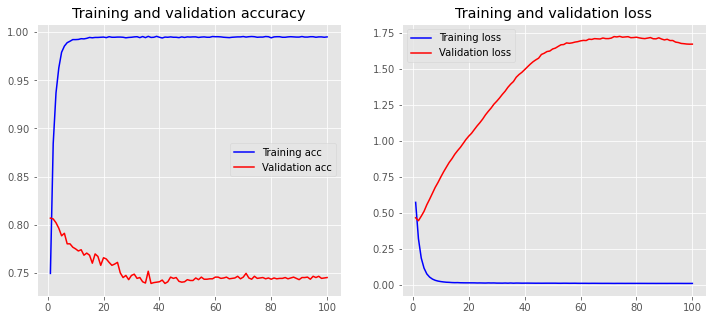

In [13]:
plot_history(history)

Now you can use the .evaluate() method to measure the accuracy of the model. You can do this both for the training data and testing data. We expect that the training data has a higher accuracy than for the testing data. Too longer you would train a neural network, the more likely it is that it starts overfitting.

Now let’s evaluate the accuracy of the model:

In [14]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9961
Testing Accuracy:  0.7452


You can already see that the model was overfitting since it reached 99.6% accuracy for the training set. But this was expected since the number of epochs was fairly large for this model. Also, the accuracy of the testing set has not surpassed our BOW models (see below).

You can see that we have trained our model for too long since the training set reached 99.6% accuracy. A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the model.

Documentation - https://keras.io/models/sequential/

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)#pred_y=[1,2,2,1,..........,2]
# evaluate the prediction results

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.7096774193548386
accuracy:0.7635726795096323
precision:0.6797116374871267
recall:0.7424071991001124


In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf = clf.fit(df_train_x, train_y)
#df_importance = pd.DataFrame(zip(df_train_x.columns, clf.coef_[0]), columns=["feature", "weight"])
#df_importance.sort_values("weight", ascending=False)
pred_y = clf.predict(df_test_x)
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.7311015118790497
accuracy:0.7819614711033275
precision:0.6972193614830072
recall:0.7684449489216799


In [17]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.7549947423764459
accuracy:0.7959719789842382
precision:0.7394438722966015
recall:0.7712137486573577


In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.7592695074709463
accuracy:0.8095446584938704
precision:0.7064881565396498
recall:0.8205741626794258


Note: When training neural networks, you should use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.

This makes sure that you don’t overfit the model. Using the validation set to choose the best model is a form of data leakage (or “cheating”) to get to pick the result that produced the best test score out of hundreds of them. Data leakage happens when information outside the training data set is used in the model.

In [19]:
X_valid, X_train = train_x[:2664], train_x[2664:]
y_valid, y_train = train_y[:2664], train_y[2664:]
#X_test = test_x

In [20]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_valid, y_valid),
                     batch_size=10)

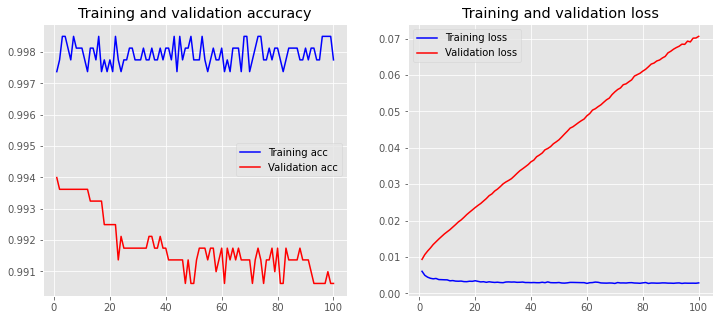

In [21]:
plot_history(history)

In [23]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9985
Testing Accuracy:  0.7627
